**Answer the following questions for the given US census data.**

Instructions:
- Drop duplicate records if present.
- Create visualizations where ever necessary.
- Submit your work in Jupyter Notebook and in HTML format with all the results.





**Data Dictionary:**

Unique values of features:
- `age`: continuous.
- `workclass`: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- `fnlwgt`: continuous.
- `education`: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- `education-num`: continuous.
- `marital-status`: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- `occupation`: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- `relationship`: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- `race`: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- `sex`: Female, Male.
- `capital-gain`: continuous.
- `capital-loss`: continuous.
- `hours-per-week`: continuous.
- `native-country`: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.   
- `salary`: >50K,<=50K

**1. How many men and women (*sex* feature) are represented in this dataset?** 

**2. What is the average age (*age* feature) of women?**

**3. What is the proportion of German citizens (*native-country* feature)?**

**4-5. What are mean value and standard deviation of the age of those who recieve more than 50K per year (*salary* feature) and those who receive less than 50K per year?**

**6. Is it true that people who receive more than 50k have at least high school education? (*education - Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters* or *Doctorate* feature)**

**7. Display statistics of age for each race (*race* feature) and each gender. Use *groupby()* and *describe()*. Find the maximum age of men of *Amer-Indian-Eskimo* race.**

**8. Among whom the proportion of those who earn a lot(>50K) is more: among married or single men (*marital-status* feature)? Consider married those who have a *marital-status* starting with *Married* (Married-civ-spouse, Married-spouse-absent or Married-AF-spouse), the rest are considered bachelors.**

**9. What is the maximum number of hours a person works per week (*hours-per-week* feature)? How many people work such a number of hours and what is the percentage of those who earn a lot among them?**

**10. Count the average time of work (*hours-per-week*) those who earning a little and a lot (*salary*) for each country (*native-country*).**


**11. Which workclass gets the highest salary?**


**12. Draw your own insights from the given data apart from the given list of questions.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:\EDA\EDA Assignment 2.csv",na_values="?")

In [85]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
#1. How many men and women (sex feature) are represented in this dataset?

In [5]:
df.sex.value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

In [6]:
#2. What is the average age (age feature) of women?

In [7]:
df.groupby('sex')['age'].mean()

sex
Female    36.858230
Male      39.433547
Name: age, dtype: float64

In [8]:
#3. What is the proportion of German citizens (native-country feature)?

In [9]:
(df['native-country'] == 'Germany').sum()/ df.shape[0]

0.004207487485028101

In [10]:
#4-5. What are mean value and standard deviation of the age of those who recieve more than 50K per year (salary feature) and those who receive less than 50K per year?

In [11]:
df[df['salary']== ">50K"]['age'].mean()

44.24984058155847

In [12]:
df[df['salary']== ">50K"]['age'].std()

10.51902771985177

In [13]:
df[df['salary']=="<=50K"]['age'].mean()

36.78373786407767

In [14]:
df[df['salary']=="<=50K"]['age'].std()

14.020088490824813

In [15]:
#6)Is it true that people who receive more than 50k have at least high school education? (education - Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters or Doctorate feature)

In [16]:
df[df['salary']==">50K"]['education'].unique()

array(['HS-grad', 'Masters', 'Bachelors', 'Some-college', 'Assoc-voc',
       'Doctorate', 'Prof-school', 'Assoc-acdm', '7th-8th', '12th',
       '10th', '11th', '9th', '5th-6th', '1st-4th'], dtype=object)

 It is not true that people who receive more than 50k have at least high school education.

In [17]:
#7. Display statistics of age for each race (race feature) and each gender. Use groupby() and describe(). Find the maximum age of men of Amer-Indian-Eskimo race.

In [18]:
df.iloc[:,[0,8]].groupby('race').describe().T

race       Amer-Indian-Eskimo  Asian-Pac-Islander        Black       Other  \
age count          311.000000         1039.000000  3124.000000  271.000000   
    mean            37.173633           37.746872    37.767926   33.457565   
    std             12.447130           12.825133    12.759290   11.538865   
    min             17.000000           17.000000    17.000000   17.000000   
    25%             28.000000           28.000000    28.000000   25.000000   
    50%             35.000000           36.000000    36.000000   31.000000   
    75%             45.500000           45.000000    46.000000   41.000000   
    max             82.000000           90.000000    90.000000   77.000000   

race              White  
age count  27816.000000  
    mean      38.769881  
    std       13.782306  
    min       17.000000  
    25%       28.000000  
    50%       37.000000  
    75%       48.000000  
    max       90.000000

In [19]:
df.iloc[:,[0,9]].groupby('sex').describe().T

sex              Female          Male
age count  10771.000000  21790.000000
    mean      36.858230     39.433547
    std       14.013697     13.370630
    min       17.000000     17.000000
    25%       25.000000     29.000000
    50%       35.000000     38.000000
    75%       46.000000     48.000000
    max       90.000000     90.000000

In [20]:
#8. Among whom the proportion of those who earn a lot(>50K) is more: among married or single men (marital-status feature)? Consider married those who have a marital-status starting with Married (Married-civ-spouse, Married-spouse-absent or Married-AF-spouse), the rest are considered bachelors.

In [21]:
df[(df["sex"] == "Male") & (df["marital-status"].str.startswith("Married"))]["salary"].value_counts(normalize=True)

<=50K    0.559486
>50K     0.440514
Name: salary, dtype: float64

In [22]:
df[(df["sex"] == "Male")& ~(df["marital-status"].str.startswith("Married"))]["salary"].value_counts(normalize=True)

<=50K    0.915505
>50K     0.084495
Name: salary, dtype: float64

In [23]:
df['marital-status'].value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital-status, dtype: int64

In [24]:
#9. What is the maximum number of hours a person works per week (hours-per-week feature)? How many people work such a number of hours and what is the percentage of those who earn a lot among them?

In [25]:
df.iloc[:,[12,14]].groupby('hours-per-week').describe()

salary                   
                count unique    top freq
hours-per-week                          
1                  20      2  <=50K   18
2                  32      2  <=50K   24
3                  39      2  <=50K   38
4                  54      2  <=50K   51
5                  60      2  <=50K   53
...               ...    ...    ...  ...
95                  2      2   >50K    1
96                  5      2  <=50K    4
97                  2      2   >50K    1
98                 11      2  <=50K    8
99                 85      2  <=50K   60

[94 rows x 4 columns]

In [26]:
df['hours-per-week'].max()

99

 The maximum number of hours a person works per week is 99.

In [27]:
df[df['hours-per-week']==df['hours-per-week'].max()].count().max()

85

 85 people work such a number of hours.

In [28]:
((df[df['hours-per-week']==df['hours-per-week'].max()]['salary']==">50K").value_counts(normalize=True)*100)

False    70.588235
True     29.411765
Name: salary, dtype: float64

 Percent of those people that earn a lot (>50K) is 29.411765

In [29]:
#10. Count the average time of work (hours-per-week) those who earning a little and a lot (salary) for each country (native-country).

In [90]:
pd.crosstab(df["native-country"],df["salary"],values=df["hours-per-week"],aggfunc=np.mean).T

native-country,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,France,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
salary,,,,,,,,,,,,,,,,,,,,,
<=50K,41.416667,37.914634,37.381818,38.684211,37.985714,42.338235,38.041667,36.030928,40.483333,41.058824,...,41.939394,38.470588,39.444444,40.15625,33.774194,42.866667,37.058824,38.825727,37.193548,41.6
>50K,40.000000,45.641026,38.900000,50.000000,42.440000,47.000000,48.750000,45.000000,44.533333,50.750000,...,41.500000,39.416667,46.666667,51.43750,46.800000,58.333333,40.000000,45.506218,39.200000,49.5


In [31]:
#11. Which workclass gets the highest salary?

In [89]:
df.groupby(df[df['salary']=='>50K']['salary'])['workclass'].value_counts()

salary  workclass       
>50K    Private             5154
        Self-emp-not-inc     724
        Self-emp-inc         622
        Local-gov            617
        Federal-gov          371
        State-gov            353
Name: workclass, dtype: int64

In [34]:
#12. Draw your own insights from the given data apart from the given list of questions.

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [36]:
df.duplicated().sum()

24

# INSIGHTS:

From the given data we have 24 duplicated values which can be dropped by using the drop function.

In [37]:
df1=df.copy()
df1.drop_duplicates(inplace=True)
df1

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [38]:
df1.shape

(32537, 15)

In [39]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64

# INSIGHTS:

From the given data we have null values in workclass, occupation and native-country columns.

In [40]:
mv=df.isnull().sum()

In [41]:
mvp=df.isnull().sum()/df.shape[0]*100

In [42]:
def missingval(df):
    mv=df.isnull().sum()
    mvp=df.isnull().sum()/df.shape[0]*100
    newdf=pd.concat([mv,mvp],axis=1)
    newdf1=newdf.rename(columns={0:'Missvalcount',1:'Missval %'})
    newdf1=newdf1[newdf1['Missvalcount']!=0].sort_values(by='Missvalcount',ascending=False)
    return newdf1

In [43]:
missingval(df)

,Missvalcount,Missval %
occupation,1843,5.660146
workclass,1836,5.638647
native-country,583,1.790486


# VISUALIZATION FOR MISSING VALUES 

In [44]:
pip install missingno

In [45]:
import missingno as ms

<AxesSubplot:>

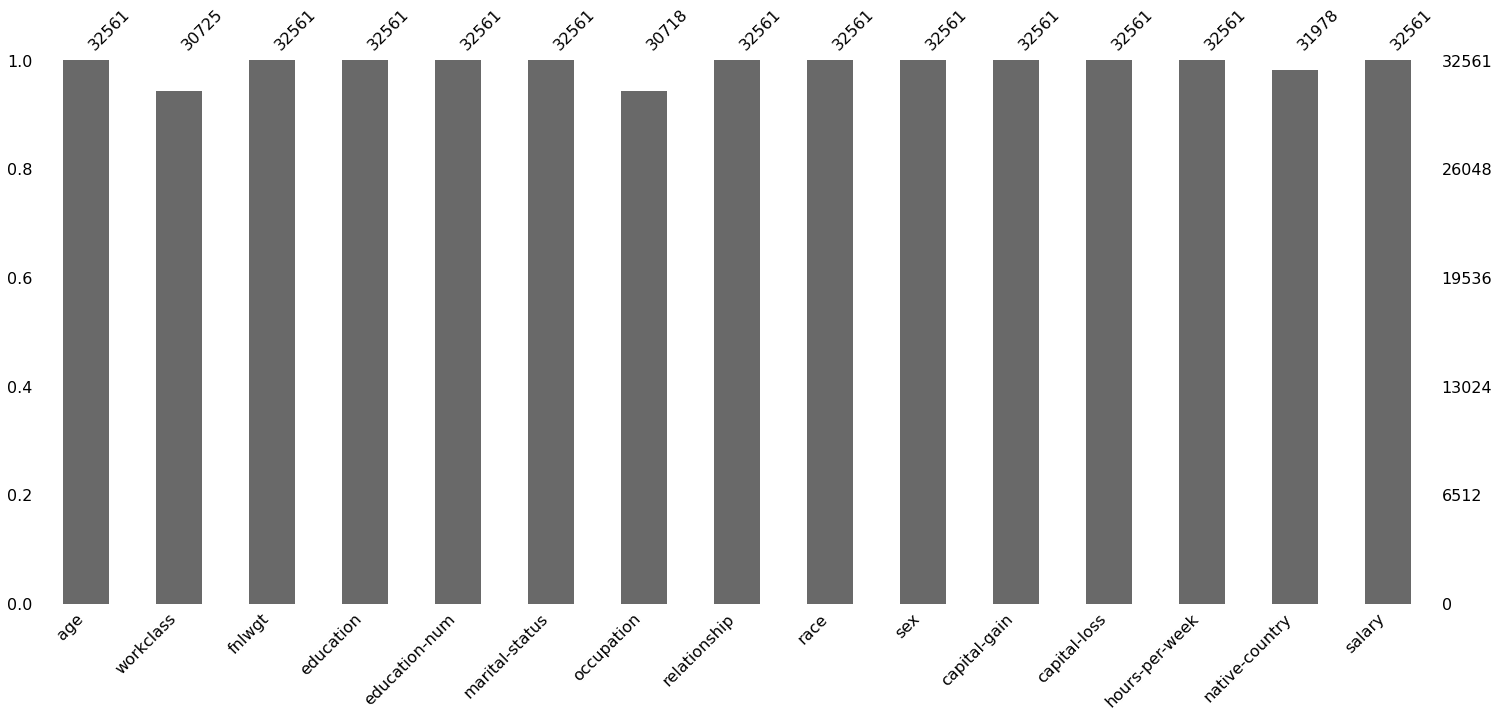

In [46]:
ms.bar(df)

# INSIGHTS:

On the left side of the plot, the y-axis scale ranges from 0.0 to 1.0, where 1.0 represents 100% data completeness.

On the right side of the plot, the scale is measured in index values.

Along the top of the plot, there are a series of numbers that represent the total count of the non-null values within that column.

Therefore we can say that the number of columns; workclass,occupation and native-country have missing values and other columns are complete and have maximum number of values.

<AxesSubplot:>

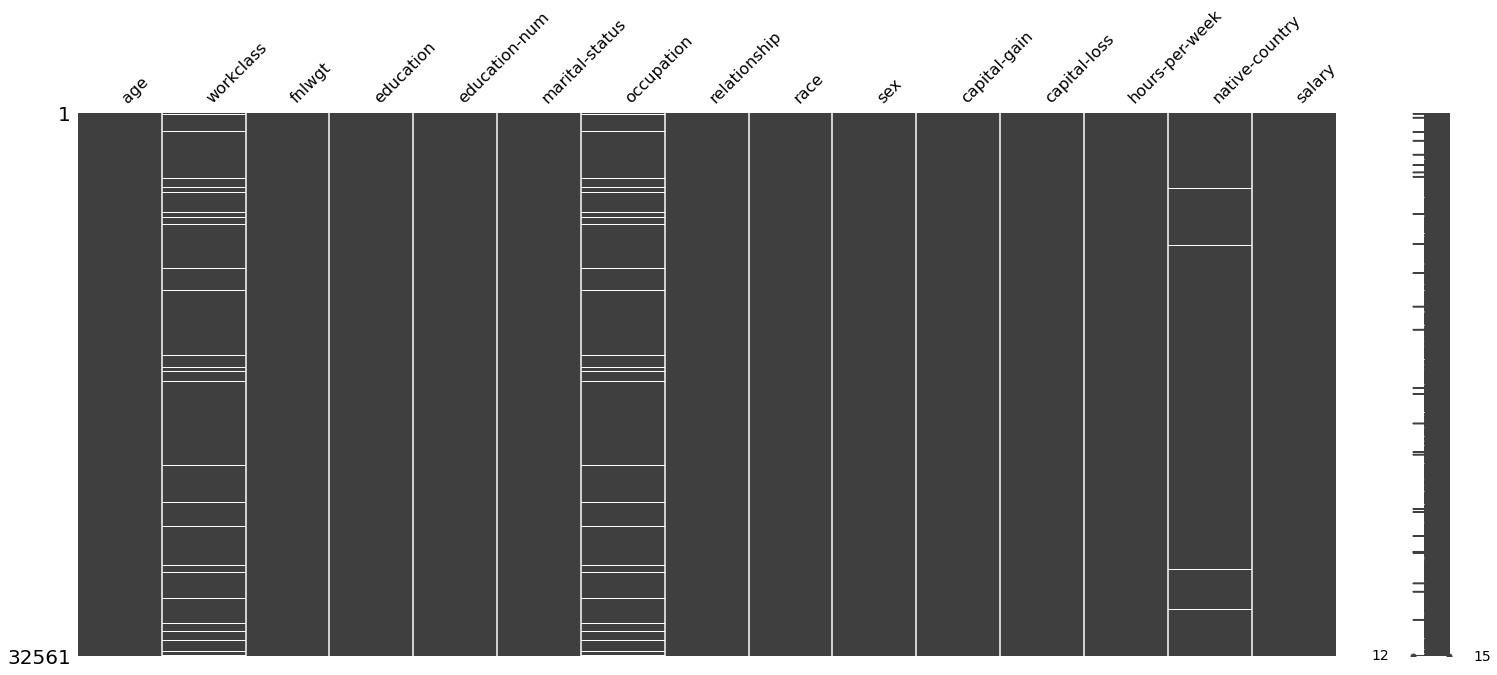

In [47]:
ms.matrix(df)

# INSIGHTS:

On the right side of the plot is a sparkline that ranges from 0 on the left to the total number of columns in the dataframe on the right.

In [48]:
#Treating the missing values
#Categorical variable- occupation,workclass and native-country.

In [49]:
df['occupation']=df['occupation'].fillna(df['occupation'].mode()[0])
missingval(df)

,Missvalcount,Missval %
workclass,1836,5.638647
native-country,583,1.790486


In [50]:
df['workclass']=df['workclass'].fillna(df['workclass'].mode()[0])
missingval(df)

,Missvalcount,Missval %
native-country,583,1.790486


In [51]:
df['native-country']=df['native-country'].fillna(df['native-country'].mode()[0])
missingval(df)

,Missvalcount,Missval %


# VISUALIZATION FOR NUMERICAL VARIABLE

<AxesSubplot:ylabel='age'>

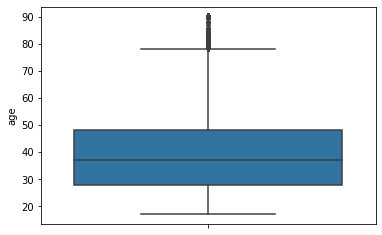

In [52]:
sns.boxplot(y='age',data=df)

# INSIGHTS:

From the above boxplot we can able to see the outliers present in the upper line.

We see that most people who work are within the age group of 17 to a little less than 80 and to those who work well beyond that up to their early 90s. It is facinating to see people work till that age.

In [53]:
# IQR method for identifying outliers
df2 = df1.copy()
IQR  = df2['age'].quantile(0.75)- df2['age'].quantile(0.25)
upper = df2['age'].quantile(0.75) + (1.5*IQR)
lower = df2['age'].quantile(0.25) - (1.5*IQR)
df2[(df2['age']> upper) | (df2['age']<lower)].shape[0]

142

In [54]:
# z score method
df3 = df1.copy()
upper = df3['age'].mean() + (3*df3['age'].std())
lower = df3['age'].mean() - (3*df3['age'].std())
df3[(df3['age']> upper) | (df3['age']<lower)].shape[0]

120

In [55]:
# Capping outliers
df4 = df1.copy()
max1 = df4['age'].quantile(0.95) 
min1 = df4['age'].quantile(0.01) 

In [56]:
df4['age'] = np.clip(df4['age'],min1,max1)

<AxesSubplot:ylabel='age'>

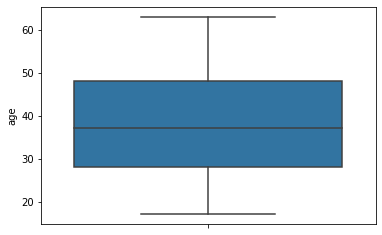

In [57]:
sns.boxplot(y='age',data=df4)

# INSIGHTS:

From the above plot we can able to see that the age distribution doesn't have any outliers.



In [58]:
df5 = df1.copy()
import matplotlib.pyplot as plt
import seaborn as sns

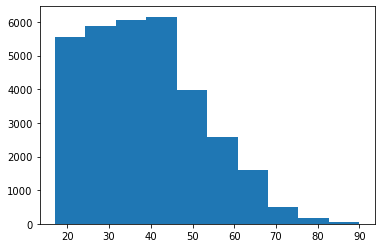

In [59]:
#To bring the data into normal distribution(Transformation)

df5['age_log'] = np.log(df5['age'])
df5['age_sqrt'] = np.sqrt(df5['age'])
plt.hist(df1['age']);

# INSIGHTS:

From the above plot we can able to see that the distribution is right side skewed with respect to age distribution which is not normal in case of orginal data with outliers present.

As more people at an younger age work in this survey.

(array([3123., 4062., 5089., 6033., 5343., 3965., 3149., 1234.,  441.,
          98.]),
 array([4.12310563, 4.65947836, 5.1958511 , 5.73222383, 6.26859657,
        6.8049693 , 7.34134204, 7.87771477, 8.41408751, 8.95046025,
        9.48683298]),
 <BarContainer object of 10 artists>)

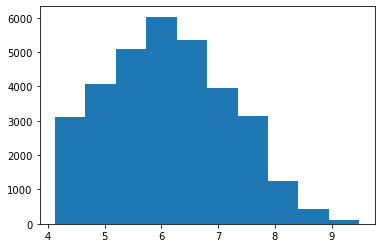

In [60]:
plt.hist(df5['age_sqrt'])

# INSIGHTS:

From the above plot we can consider that the age distribution approximately falls to normal distribution which can considered for analysis and hence the square root method brings the data into normal distribution.

(array([3123., 3277., 5046., 5220., 4792., 5215., 3221., 1907.,  594.,
         142.]),
 array([2.57128159, 2.76229391, 2.95330622, 3.14431854, 3.33533085,
        3.52634317, 3.71735548, 3.9083678 , 4.09938012, 4.29039243,
        4.48140475]),
 <BarContainer object of 10 artists>)

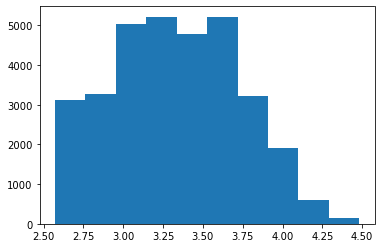

In [61]:
df5['age_cbrt'] = np.cbrt(df5['age'])
plt.hist(df5['age_cbrt'])

# INSIGHTS:

From the above plot we can see that the age distribution approximately falls to normal but not exactly, hence cuberoot method doesn't gave the age distribution into normal.

<AxesSubplot:>

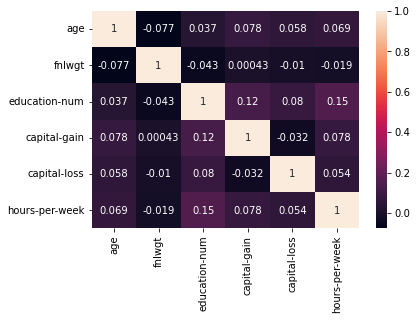

In [62]:
sns.heatmap(df.corr(),annot=True)

# INSIGHTS:

We see that no direct corelation between any of the data. This does not mean that none of the data here is correlated, we just haven't been able to find that correlation yet.

From the heatmap we see that none of the columns are correlated to each other,that is none of them have a correlation value of >0.7 or <-0.7. So we must find another way to find our features.
Selecting all features and the target column

# VISUALIZATION FOR CATEGORICAL VARIABLE:

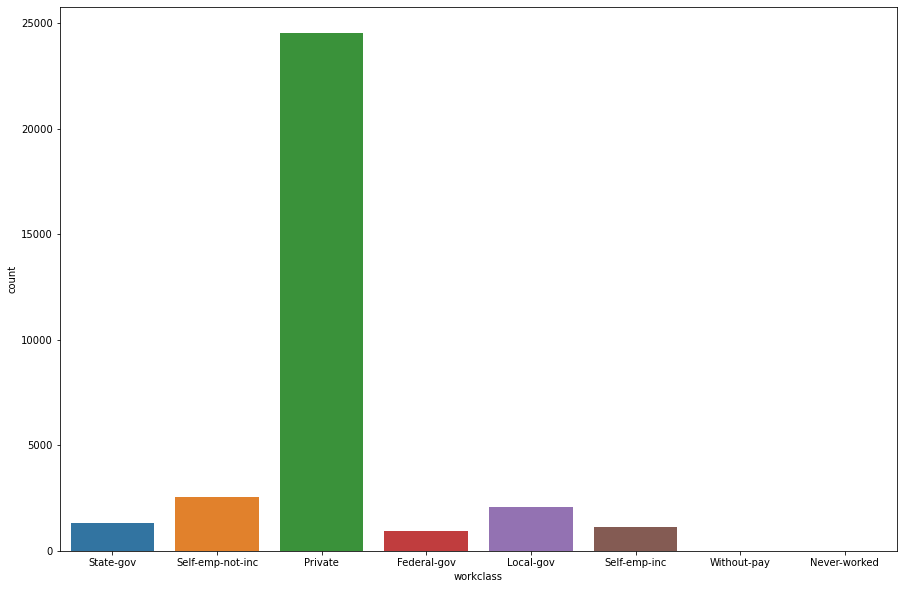

In [68]:
plt.figure(figsize = (15,10))
sns.countplot(x='workclass',data=df)
plt.show()

# INSIGHTS:

From the above plot we can say that most of the people in the survey belong to the Private sector. This is a biased data as we barely have any information on the other kind of workclasses.

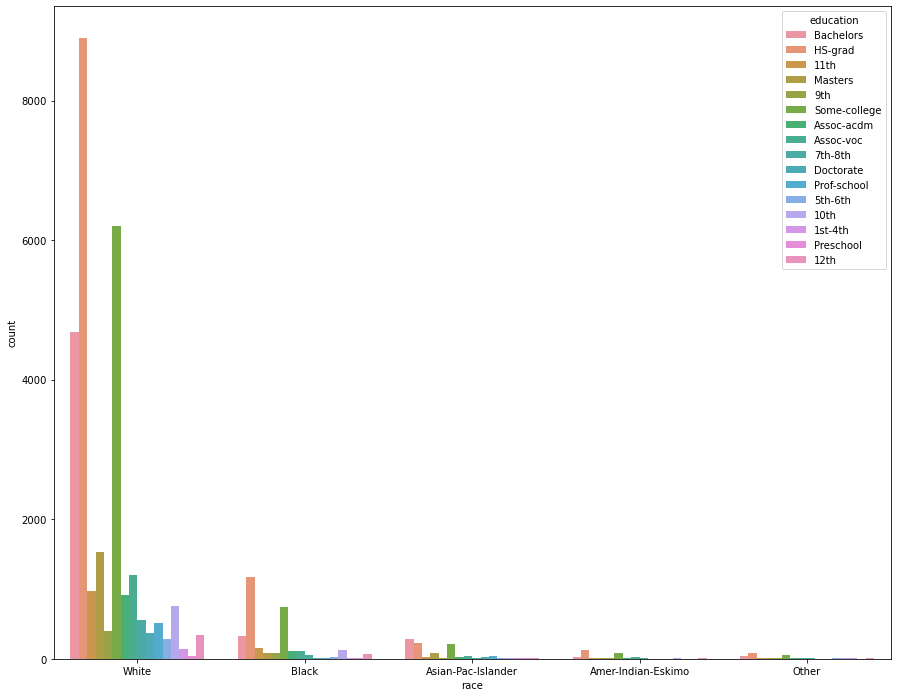

In [75]:
plt.figure(figsize=(15,12))
sns.countplot(x='race',hue='education',data=df)
plt.show()

# INSIGHTS:

We see that Most white people are HS-Grads and a lot of them have gone to some collage. The next highs are Bachelors and masters.

We see that most people belonging to the Other category do not have many high degrees and that might explain the low income potential.

We see a lot of people belonging to the Black category are HS-Grads. Since HS-Grads have a high number of people with income potential <=50k, this may explain why the ratio is so high.

For asia-pac-islanders, a lot of people in their category have done masters (compared to other degrees it isnt that low) which may have contributed to their higher income potential.

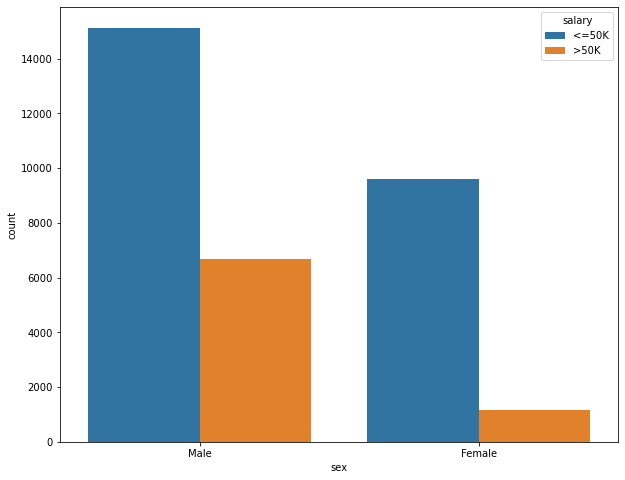

In [88]:
plt.figure(figsize=(10,8))
sns.countplot(x='sex',hue='salary',data=df)
plt.show()

# INSIGHTS:

From the above plot we can see that when it comes to the ratio of Males being paid >50k and <-50k is around 2.3 but for women, the same ratio drops down to 8.1. 

This implies that women are being paid less. 



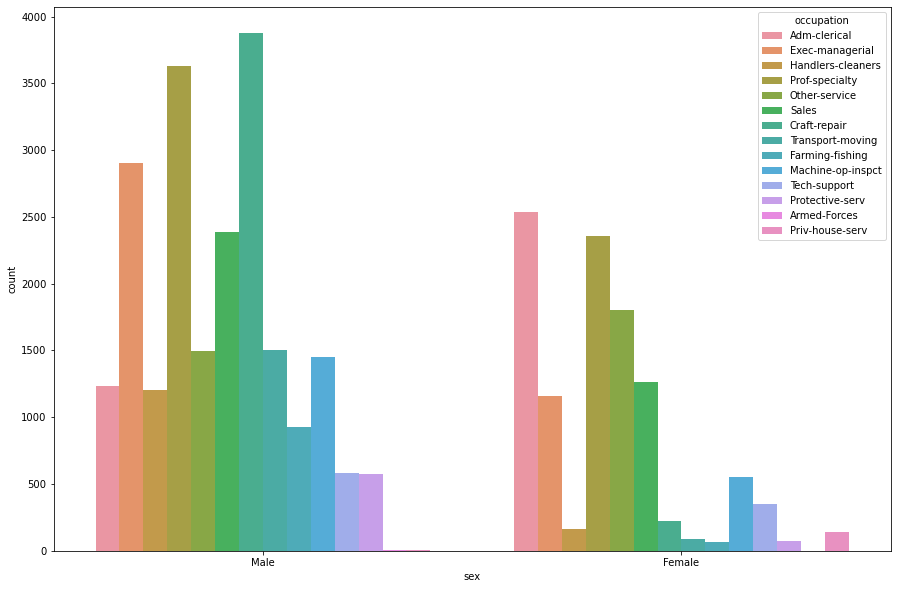

In [78]:
plt.figure(figsize=(15,10))
sns.countplot(x='sex',hue='occupation',data=df)
plt.show()

# INSIGHTS:

From the above plot we can say that Women dominate the adm-clerical, other services, priv-house-ervices. However in all the services, a majority of people get paid <=50k.



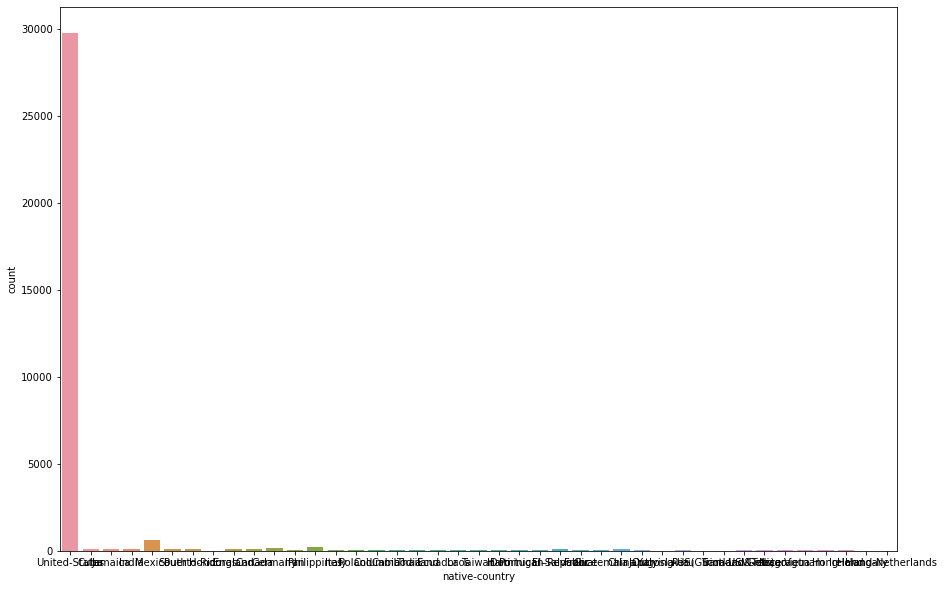

In [83]:
plt.figure(figsize=(15,10))
sns.countplot(x='native-country',data=df)
plt.show()

# INSIGHTS:

From the above plot we can able to see that it is a highly biased dataset. So we can just replace all the null values with US and it will be fine.

We also notice that there is no inconsistency in the data (like US, USA, United States in one dataset).